<a href="https://colab.research.google.com/github/gonzalowho/DataScience/blob/master/100.Examen/2022/Ejercicio_Parcial_1_Bimestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Tipo Parcial

El ministerio de salud de la nación les solicita realizar un programa que les permita visualizar el estado de ciudadanos infectados con COVID-19 en todas sus variantes en un rango de fecha determinado y comparar esos resultados con los niveles de vacunación.
A su vez, se les solicita que realicen una compración con otro(s) país(es). (Seleccionar como máximo 2 adicionales)

Para ello, un analista le provee los siguientes archivos.

[Vacunación Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv)

[Casos COVID Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv)


Consideraciones:

* Rango de Fechas desde 01/01/2021 a 15/01/2021
* Importar los archivos y trabajarlos como diccionarios o dataframes. El caracter delimitador de los archivos es el **';'**
* Realizar al menos 4 charts que representen la información solicitada
* Utilizar funciones
* Generar un archivo que posea la siguiente estructura de datos dscriminado por el rango de fechas.
```
ID:{
'país':value,
'fecha':value,
'nuevos_casos':value,
'nuevas_muertes':value,
'total_vacunados':value
}
```
* Documentar cada paso con bloques de texto adicionalmente a notas en el código
* Presentar por pantalla el total acumulado de infectados y de vacunados en el rango de fechas solicitado
* Proveer una breve conclusión como parte del análisis 





## TIPS

In [ ]:
import csv
file = ('./sample_data/country_vaccinations.csv')
covid_vaccines={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';') #Delimitador ;
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
import csv
file = ('./sample_data/owid-covid-data.csv')
covid_cases={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';')
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
var = '1.0'

split = var.split('.')[0] # Dividir cadena de caracteres para eliminar los caracteres detras del .

print(var)
print(int(split))

---


## Carga de datos

In [156]:





# Ingrese código aquí
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv',sep=';')
df1 = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv')

df3 = df[(df['date'] >= '01/01/2021') & (df['date'] <= '01/15/2021')]
df2 = df1[(df1['date'] >= '2021-01-01') & (df1['date'] <= '2021-01-15')]

country_list = ['ARG','BRA','CHN']

df4 = df2[df2['iso_code'].isin(country_list)]
filtered_df = df4[["iso_code","location","total_cases","new_cases","new_cases_smoothed","new_cases_per_million","new_cases_smoothed_per_million","continent","date"]]

lista_dates = filtered_df["date"].unique()

#arg_df = filtered_df[filtered_df['iso_code']==('ARG')]
#usa_df = filtered_df[filtered_df['iso_code']==('BRA')]
#chn_df = filtered_df[filtered_df['iso_code']==('CHN')]






In [166]:
def df_pais (df, pais):
  df1 = df[df['iso_code']==(pais)]
  cases = df1["new_cases"].tolist()
  return cases

arg_cases = df_pais(filtered_df, 'ARG')
bra_cases = df_pais(filtered_df, 'BRA')
chn_cases = df_pais(filtered_df, 'CHN')

arg_vac = df_pais(df3, 'ARG')
bra_vac = df_pais(df3, 'BRA')
chn_vac = df_pais(df3, 'CHN')



KeyError: ignored

In [165]:
df3

,iso_code,date,daily_vaccinations
7,AFG,01/03/2021,1580.0
38,AFG,01/04/2021,3000.0
82,ALB,01/02/2021,0.0
110,ALB,01/03/2021,1081.0
141,ALB,01/04/2021,13731.0
...,...,...,...
14064,OWID_WLS,01/02/2021,21508.0
14092,OWID_WLS,01/03/2021,17974.0
14123,OWID_WLS,01/04/2021,27053.0
14172,ZWE,01/03/2021,2877.0


<Figure size 432x288 with 0 Axes>

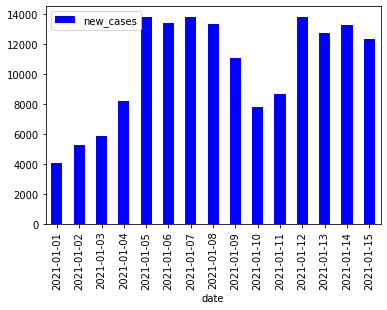

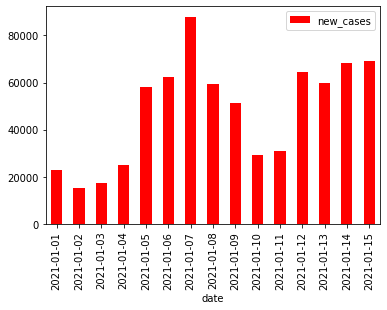

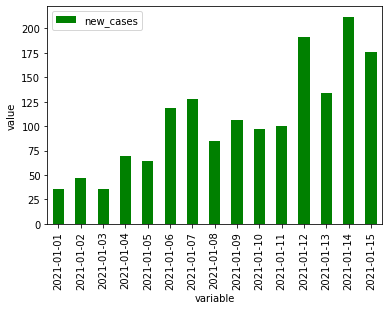

In [155]:

#df1.info()
#print(df4)
import matplotlib.pyplot as plt

plt.figure()
arg_df.plot(kind='bar',x='date',y='new_cases',color='blue')
usa_df.plot(kind='bar',x='date',y='new_cases',color='red')
chn_df.plot(kind='bar',x='date',y='new_cases',color='green')
plt.xlabel('variable')
plt.ylabel('value')

plt.show()




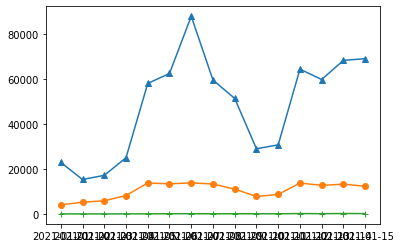

In [153]:

arg_df = filtered_df[filtered_df['iso_code']==('ARG')]
usa_df = filtered_df[filtered_df['iso_code']==('BRA')]
chn_df = filtered_df[filtered_df['iso_code']==('CHN')]
#df4 = filtered_df[filtered_df['iso_code'].isin(country_list)]
arg_cases = arg_df["new_cases"].tolist()
bra_cases = usa_df["new_cases"].tolist()
chn_cases = chn_df["new_cases"].tolist()
lista_dates = arg_df["date"].tolist()
#ist_of_single_column = df['DOB'].tolist()
lista_dates


dic={"usa":bra_cases, "arg":arg_cases, "chn":chn_cases }
dic


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots()
ax.plot(lista_dates, dic["usa"], marker = '^')
ax.plot(lista_dates, dic["arg"], marker = 'o')
ax.plot(lista_dates, dic["chn"], marker = '+')
plt.show()

In [151]:
usa_df

,iso_code,location,total_cases,new_cases,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,continent,date


{'arg': [1629594.0,
  1634834.0,
  1640718.0,
  1648940.0,
  1662730.0,
  1676171.0,
  1690006.0,
  1703352.0,
  1714409.0,
  1722217.0,
  1730921.0,
  1744704.0,
  1757429.0,
  1770715.0,
  1783047.0],
 'usa': [20370331.0,
  20642613.0,
  20846009.0,
  21031524.0,
  21264387.0,
  21524152.0,
  21810403.0,
  22114479.0,
  22379229.0,
  22590075.0,
  22794045.0,
  23015865.0,
  23245207.0,
  23480787.0,
  23725783.0]}

## Limpieza de datos

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Transformación de datos

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Análisis y Visualizaciones

*Ingrese su análisis aquí*


In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Conclusión

*Ingrese conclusión aquí*

In [ ]:
# Ingrese código aquí

## Almacenamiento de resultados

In [ ]:
# Ingrese código aquí